# Exercises
1. Create a new file named `model_evaluation.py` or `model_evaluation.ipynb` for these exercises.
2. Given the following confusion matrix, evaluate (by hand) the model's performance.


|               | pred dog   | pred cat   |
|:------------  |-----------:|-----------:|
| actual dog    |         46 |         7  |
| actual cat    |         13 |         34 |

  - In the context of this problem, what is a false positive?

If it's a Cat predictor...

`actual dog` & `pred cat` = `7`

  - In the context of this problem, what is a false negative?

`pred dog` & `actual cat` = `13`

  - How would you describe this model?

This is a `confusion matrix`

3. You are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant.

Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects, and the data from their predictions can be found here.

In [5]:
df = pd.read_csv('c3.csv')

Use the predictions dataset and pandas to help answer the following questions:

In [6]:
df

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect
3,No Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect
...,...,...,...,...
195,No Defect,No Defect,Defect,Defect
196,Defect,Defect,No Defect,No Defect
197,No Defect,No Defect,No Defect,No Defect
198,No Defect,No Defect,Defect,Defect


  - An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

In [8]:
df_defect = df[df.actual == 'Defect']
df_defect

,actual,model1,model2,model3
13,Defect,No Defect,Defect,Defect
30,Defect,Defect,No Defect,Defect
65,Defect,Defect,Defect,Defect
70,Defect,Defect,Defect,Defect
74,Defect,No Defect,No Defect,Defect
87,Defect,No Defect,Defect,Defect
118,Defect,No Defect,Defect,No Defect
135,Defect,Defect,No Defect,Defect
140,Defect,No Defect,Defect,Defect
147,Defect,Defect,No Defect,Defect


In [13]:
for col in df_defect:
    print(df_defect[col].value_counts())

Defect    16
Name: actual, dtype: int64
No Defect    8
Defect       8
Name: model1, dtype: int64
Defect       9
No Defect    7
Name: model2, dtype: int64
Defect       13
No Defect     3
Name: model3, dtype: int64


#### As a `Defect` predictor the `Positive` is `Defect` and the negative is `No Defect`


|  Prediction |   ACTUAL   |             |                     |
|:------------|-----------:|------------:|--------------------:|
|             |  Defect    |   No Defect |                     |
|  Defect     |   TP       |    FP       | Precision TP/(TP+FP)|
| No Defect   |   FN       |    TN       |   NPV: TN/(TN+FN)   |
|             | Recall     | Specificity |       Accuracy      |
|             | TP/(TP+FN) | TN/(FP+TN)  |(TP+TN)/(TP+FP+TN+FN)|             

**Recall:&ensp;&ensp;&ensp;&ensp;&ensp; $\displaystyle\frac{T^P}{(T^P+F^N)}$**
<br><br>
**Model 3: 
<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Predicts Defect: 13 times
<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; >>> $T^P = 13$
<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; >>> $F^N = 3$
<br><br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; $\displaystyle\frac{13}{(13+3)} = 81.25\%$**

  - Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

In [21]:
df_no_defect = df[df.actual == 'No Defect']

In [22]:
df_no_defect.actual.unique()

array(['No Defect'], dtype=object)

In [33]:
df_no_defect.model1.value_counts([1])[1]

0.010869565217391304

In [35]:
counter = 1
for col in df_no_defect.drop(columns='actual'):
    FPp = df_no_defect[col].value_counts([1])[1] 
    if FPp < counter:
        counter = FPp
        model = col.upper()
    print(df_no_defect[col].value_counts(),'\n__________________________')
print(f'\n\nThe winning model is {model} with {Percent(1-counter)} specificity!')

No Defect    182
Defect         2
Name: model1, dtype: int64 
__________________________
No Defect    103
Defect        81
Name: model2, dtype: int64 
__________________________
No Defect    98
Defect       86
Name: model3, dtype: int64 
__________________________


The winning model is MODEL1 with 98.91% specificity!


**Specificity:&ensp;&ensp;&ensp;&ensp;&ensp; $\displaystyle\frac{T^N}{(F^P+T^N)}$**
<br><br>
**Model 1: 
<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Predicts Defect: 2 times
<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; >>> $T^N = 184$
<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; >>> $F^P = 2$
<br><br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; $\displaystyle\frac{184}{(184+2)} = 98.92\%$**

4.  You are working as a data scientist for Gives You Paws ™, a subscription based service that shows you cute pictures of dogs or cats (or both for an additional fee).

#### At Gives You Paws™, anyone can upload pictures of their cats or dogs.<br><br> The photos are then put through a two step process. <br><br>First an automated algorithm tags pictures as either a cat or a dog (Phase I). <br><br>Next, the photos that have been initially identified are put through another round of review,<br><br> possibly with some human oversight, before being presented to the users (Phase II).

  - Several models have already been developed with the data, and you can find their results here.

In [39]:
df = pd.read_csv('gives_you_paws.csv')
df

,actual,model1,model2,model3,model4
0,cat,cat,dog,cat,dog
1,dog,dog,cat,cat,dog
2,dog,cat,cat,cat,dog
3,dog,dog,dog,cat,dog
4,cat,cat,cat,dog,dog
...,...,...,...,...,...
4995,dog,dog,dog,dog,dog
4996,dog,dog,cat,cat,dog
4997,dog,cat,cat,dog,dog
4998,cat,cat,cat,cat,dog


#### Given this dataset, use pandas to create a baseline model (i.e. a model that just predicts the most common class) and answer the following questions:

In [40]:
df.actual.mode()

0    dog
Name: actual, dtype: object

  - a. In terms of accuracy, how do the various models compare to the baseline model? Are any of the models better than the baseline?

In [74]:
baseline = df.actual == df.actual.mode()[0]
baseline.value_counts(dropna=False)

True     3254
False    1746
Name: actual, dtype: int64

In [43]:
TP = 3254
TN = 1746
FP = 1746
FN = 0

In [45]:
print(f'Accuracy = {Percent((TP+TN)/(TP+TN+FP+FN))}')

Accuracy = 74.12%


In [70]:
def confusion():
    print(f'Accuracy = {Percent((TP+TN)/(TP+TN+FP+FN))}')
    print(f'Precision = {Percent(TP/(TP+FP))}')
    print(f'NPV = {Percent(TN/(TN+FN))}')
    print(f'Recall = {Percent(TP/(TP+FN))}')
    print(f'Specificity = {Percent(TN/(TN+FP))}')

In [71]:
confusion()

Accuracy = 74.12%
Precision = 65.08%
NPV = 100.00%
Recall = 100.00%
Specificity = 50.00%


In [78]:
df.model1.value_counts()

dog    2937
cat    2063
Name: model1, dtype: int64

  - b. Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recomend for Phase I? For Phase II?

In [81]:
counter = 1
for col in df:#.drop(columns='actual'):
#     FPp = df[col].value_counts([1])[1] 
#     if FPp < counter:
#         counter = FPp
#         model = col.upper()
    print(df[col].value_counts(),'\n__________________________')
# print(f'\n\nThe winning model is {model} with {Percent(1-counter)} specificity!')

dog    3254
cat    1746
Name: actual, dtype: int64 
__________________________
dog    2937
cat    2063
Name: model1, dtype: int64 
__________________________
cat    3212
dog    1788
Name: model2, dtype: int64 
__________________________
dog    2508
cat    2492
Name: model3, dtype: int64 
__________________________
dog    4253
cat     747
Name: model4, dtype: int64 
__________________________


## Model 4

  - c. Suppose you are working on a team that solely deals with cat pictures. Which of these models would you recomend for Phase I? For Phase II?

## Model 3

5. Follow the links below to read the documentation about each function, then apply those functions to the data from the previous problem.

  - sklearn.metrics.accuracy_score
  - sklearn.metrics.precision_score
  - sklearn.metrics.recall_score
  - sklearn.metrics.classification_report

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [83]:
accuracy_score(df.actual,df.model1)

0.8074

`accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)`

In [85]:
precision_score(df.actual,df.model1, pos_label='dog')

0.8900238338440586

`precision_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)`

In [87]:
recall_score(df.actual,df.model1, pos_label='dog')

0.803318992009834

`recall_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)`

In [90]:
print(classification_report(df.actual,df.model1))

              precision    recall  f1-score   support

         cat       0.69      0.82      0.75      1746
         dog       0.89      0.80      0.84      3254

    accuracy                           0.81      5000
   macro avg       0.79      0.81      0.80      5000
weighted avg       0.82      0.81      0.81      5000



`classification_report(
    y_true,
    y_pred,
    *,
    labels=None,
    target_names=None,
    sample_weight=None,
    digits=2,
    output_dict=False,
    zero_division='warn',
)`

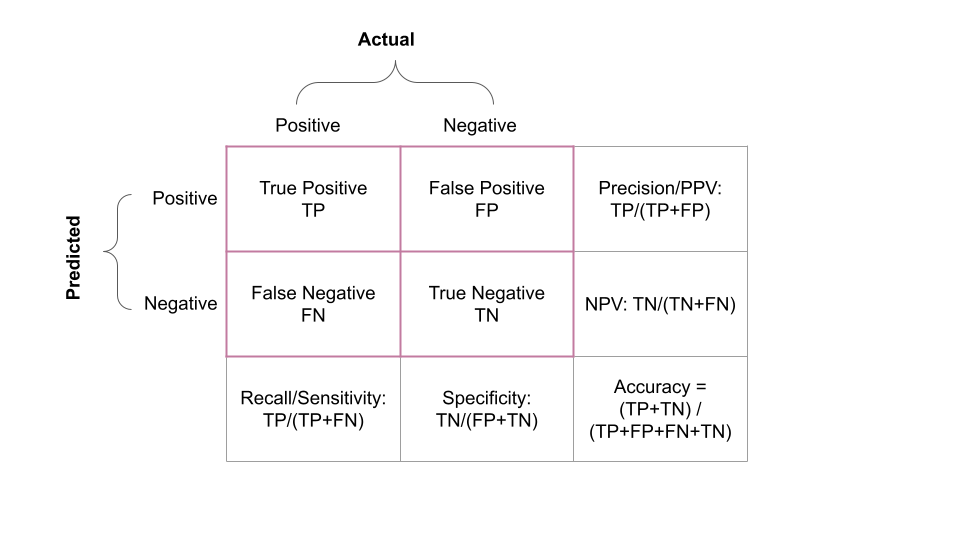

In [101]:
from IPython import display
display.Image("https://ds.codeup.com/classification/annotated_confusion_matrix.png")

FileNotFoundError: No such file or directory: '





<!DOCTYPE html>
<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark" data-a11y-animated-images="system">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">
  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>
  <link rel="preconnect" href="https://avatars.githubusercontent.com">



  <link crossorigin="anonymous" media="all" integrity="sha512-UXiu4O52iBFkqt6Kx5t+pqHYP2/LWWIw9+l5ia74TWw+xPzpH44BFfAQp7yzCe0XFGZa72Xiqyml6tox1KkUjw==" rel="stylesheet" href="https://github.githubassets.com/assets/light-5178aee0ee76.css" /><link crossorigin="anonymous" media="all" integrity="sha512-IX1PnI5wWBz8Kgb1JI0f2QFa/WuRQQHJHe0vkKinQzsxRlNb4b8NgODX5htSZVAAkA1O6Vch+RRlDTI8j96slA==" rel="stylesheet" href="https://github.githubassets.com/assets/dark-217d4f9c8e70.css" /><link data-color-theme="dark_dimmed" crossorigin="anonymous" media="all" integrity="sha512-Ct+ijw5ofrvpiRNwv+EhmU4CBCIgm7ApMfRCT8IQK4luRFZf8tLg0CC0VLyTPVLgMbQ9+74znLAZwi1RSzjpiA==" rel="stylesheet" data-href="https://github.githubassets.com/assets/dark_dimmed-0adfa28f0e68.css" /><link data-color-theme="dark_high_contrast" crossorigin="anonymous" media="all" integrity="sha512-HIV1s2ZEVz1WLyBRua8znQozNKaQ0LM5AHRX9sMlitm5TNY3QMJzKsRD5FPCF9oluzIXNO9JxRK4bBjxGhcctA==" rel="stylesheet" data-href="https://github.githubassets.com/assets/dark_high_contrast-1c8575b36644.css" /><link data-color-theme="dark_colorblind" crossorigin="anonymous" media="all" integrity="sha512-URPSviCw4m4n71IKn4qyu7MEDpGbCiTfsMTNrUjPwcg38KtEKDt12vzjlNzoy3YDFiQ8D0TCCYKCtrZpqX097g==" rel="stylesheet" data-href="https://github.githubassets.com/assets/dark_colorblind-5113d2be20b0.css" /><link data-color-theme="light_colorblind" crossorigin="anonymous" media="all" integrity="sha512-yWrddCSE7sqLZ4iqcSOoAsVnCbxs4IgN+oDKgxarp3O6V9dQ8XKyE+ffedHQa55VkB1tY0iNI3QqACG8p1k8IA==" rel="stylesheet" data-href="https://github.githubassets.com/assets/light_colorblind-c96add742484.css" /><link data-color-theme="light_high_contrast" crossorigin="anonymous" media="all" integrity="sha512-KQ+S9ehnvP9vzfiaBA1FbrSWS1RuJBo/ez+bKUm+XKGEMR22w7Oyc712UyVcpYIqpTCTvaaJ3MfeU0x4xPeI+A==" rel="stylesheet" data-href="https://github.githubassets.com/assets/light_high_contrast-290f92f5e867.css" /><link data-color-theme="light_tritanopia" crossorigin="anonymous" media="all" integrity="sha512-zdiPFGv3QFuv1X24wK9Sa7DM3W/It82kehdMBrepjoJJyJyBISVFUJLvMMkvr4uu8j11Rn35dXZiVrN1FNWzGA==" rel="stylesheet" data-href="https://github.githubassets.com/assets/light_tritanopia-cdd88f146bf7.css" /><link data-color-theme="dark_tritanopia" crossorigin="anonymous" media="all" integrity="sha512-IXHqDweLGMT47BTl4v+0woPqFAAtkFBeVqg9U/AliukeUyVREIssCu32RfWmXNdMjwmdVBcS+q9SMQMYuYF5dQ==" rel="stylesheet" data-href="https://github.githubassets.com/assets/dark_tritanopia-2171ea0f078b.css" />
  
    <link crossorigin="anonymous" media="all" integrity="sha512-SUqyEQoqiybF4TGdLH0th4vDL9I9EFGTXfcth9CIVAoNeQJfAyfu8MtmOMWbGnqP6VxFIQ6VdDHxhdXNG1k//Q==" rel="stylesheet" href="https://github.githubassets.com/assets/primer-494ab2110a2a.css" />
    <link crossorigin="anonymous" media="all" integrity="sha512-WpEU879FYZARmAjzNcWfiQz7H1brF7U498FzsLKR3WKKWocnD6xyloi2QjZ5YtsafUWURBj5Cz9o07W8IKOUbQ==" rel="stylesheet" href="https://github.githubassets.com/assets/global-5a9114f3bf45.css" />
    <link crossorigin="anonymous" media="all" integrity="sha512-u+6ONj7UMG97+vQl6VPG2mR1H53mP624MFArOko/EK/I+ZlZQD6AH4zHukWOcvfm5lnI1GLi9AdxFLArgms1Ug==" rel="stylesheet" href="https://github.githubassets.com/assets/github-bbee8e363ed4.css" />
  



  <script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-yS2PcpzM3ceQuV4P5+bqnvgf8771dzPxRzvxyeapE+h4kLHNK6SXAfQ7reXc5auaEod0J3iUda0b3GCeUNQasw==" src="https://github.githubassets.com/assets/runtime-c92d8f729ccc.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-ivm676uepRn1vQvL/mShZVrbNfsUUZRp0a2RCZNYrFJYFlYhdDU2P+UC8axgVT17oqv1BVQLngSsGoiBN2MJpw==" src="https://github.githubassets.com/assets/vendors-node_modules_manuelpuyol_turbo_dist_turbo_es2017-esm_js-8af9baefab9e.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-GB4jwt8fni2MoE1wzROiGvrgScSHotjr1A9c1FQKUTsfuFn9W2y5/knx+uD8eOAC1rVSA3UPi3h+PTwAuaDZYQ==" src="https://github.githubassets.com/assets/vendors-node_modules_stacktrace-parser_dist_stack-trace-parser_esm_js-node_modules_github_bro-a4c183-181e23c2df1f.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-2SerPrWVdwzHS5122vJBgSSpm90BG2FuGQKBap/Qj4Vi975I1t9e5V0JQ5AGkoZmuK+NNr79TD7OUN9A+Y1t6w==" src="https://github.githubassets.com/assets/environment-d927ab3eb595.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-ZQM3kW293O7WR1cDuHZ02wendjejLzwVD0wy4L1eCNr34RHXiY05wmHUx4hnV9WELD/OEZRGrzK+M8uwiZ/WEw==" src="https://github.githubassets.com/assets/vendors-node_modules_selector-observer_dist_index_esm_js-650337916dbd.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-Si8390GeCVPslYj8WomaMCyj33Jutd8vZ+Sdi6WXLSbdZRyC4wwijhTNyLy0zpHhfYnrynP6qArdz1PXti1sOg==" src="https://github.githubassets.com/assets/vendors-node_modules_delegated-events_dist_index_js-node_modules_github_details-dialog-elemen-63debe-4a2f37f7419e.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-IW3JseO0m0yclixsxDwuXBlAp0+bXVZkAzcVRd5lkCD0Ue980eWiIMfA6uj69EXXq3KwhHWewR3/HTeR+v5G8A==" src="https://github.githubassets.com/assets/vendors-node_modules_github_filter-input-element_dist_index_js-node_modules_github_remote-inp-c7e9ed-216dc9b1e3b4.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-OMNqWXGEHws0bOVmDm9Nau8e8ZrjKUF77hq8heNd45JYuDu+gm4tZhYB/bUbysfBQ/6y31S1R0VIpjOHiCotUA==" src="https://github.githubassets.com/assets/vendors-node_modules_github_catalyst_lib_index_js-node_modules_github_time-elements_dist_index_js-38c36a597184.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-0spbqRlGZ/7LnB7VMP6g5uqkJ2V+2QYrLwsoRQ98Vvw6NZuSEaqs+VvZ2AKpTj20Jv336D4Z9Ue6koMWnTzCXg==" src="https://github.githubassets.com/assets/vendors-node_modules_github_clipboard-copy-element_dist_index_esm_js-node_modules_github_mark-f079ea-d2ca5ba91946.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-RGVcB6gZf6KXgW6ybbWo6x51i6+qFg7hVO5EvlPdYWzQYpjrF5qym7/xQaIvRUFC2y7kCX5y2xg04lpZ21Dkhg==" src="https://github.githubassets.com/assets/vendors-node_modules_github_file-attachment-element_dist_index_js-node_modules_primer_view-co-b3d32f-44655c07a819.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-VIfOunBprhUcFctmrXIqpc9faEITK2Fj1kmg+v814LcciwMkpaa0PvP8dbISOF7MQFHCRXzoseSpH0KlStRcbQ==" src="https://github.githubassets.com/assets/github-elements-5487ceba7069.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-snnd8i/F+EVdq0ZXEo2TWNgS7zIIBa6w1uAQBQ0V/tkW+jZEsU+zfmCwugV3nchvm3cGBGcSduJRWMvVBG4SSw==" src="https://github.githubassets.com/assets/element-registry-b279ddf22fc5.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-6VTowByTC7C1Ae4nuESJ5iT76vchmVCzjuit7IR83B/TPkwjSserSlr83SYhLvIfNLvJfB2zH0bHBr8+fzIa+w==" src="https://github.githubassets.com/assets/vendors-node_modules_lit-html_lit-html_js-e954e8c01c93.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-3YkTrGWwrb2whIVWEwKEhghL4yI2UAHnLW/QtnYMQFLkfQUYD3gtJ2WqDJg8wzzSm0rP05KFDOsKKx4a1wQRdA==" src="https://github.githubassets.com/assets/vendors-node_modules_github_mini-throttle_dist_index_js-node_modules_github_hotkey_dist_index-9f48bd-dd8913ac65b0.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-YlZzfDs0sJwb4LDPoYGzppaasG/yvY8DolVk64u7Kjpyz/NpKS3E7toBkHcDxNSB8x7mlDDjC2nHuWiltsMGvQ==" src="https://github.githubassets.com/assets/vendors-node_modules_github_remote-form_dist_index_js-node_modules_github_catalyst_lib_index_-bd1f73-6256737c3b34.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-V4+K12am3OXCOQYegHoAFHR3Y4Zy9u97+gR5aLOTVia3tTeNPe39FlKnvnwjndeuEOWfkzXKB2iL2UwOKOZM+g==" src="https://github.githubassets.com/assets/vendors-node_modules_github_paste-markdown_dist_index_esm_js-node_modules_koddsson_textarea-c-586f78-578f8ad766a6.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-VY2CzuSOZRicBEh6k2l9QSBhAi9ZDNjxREDsYUHzzVMK/cJDyb40PYTGQuAhrNZh69oAo3ap8ZEwaAJxeX6TOg==" src="https://github.githubassets.com/assets/vendors-node_modules_github_quote-selection_dist_index_js-node_modules_github_session-resume_-1c1fef-558d82cee48e.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-iv5zc66CDnM+oVHCDv7cko+Bee6Q895DqJ52+TvMOtDYiEWLpTjQheRSbAygXr1SdVa7CSDLpnj3ze+dv1eIaw==" src="https://github.githubassets.com/assets/app_assets_modules_github_soft-nav_navigate_ts-8afe7373ae82.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-KD3D2b33I5qaAa+WTVFFwYVEJ8IU3yIPmJzm7DJz/4EXR77iHpG/FmALojXov3metaa41+XcrQKAf1e5iBmFWw==" src="https://github.githubassets.com/assets/app_assets_modules_github_behaviors_keyboard-shortcuts-helper_ts-app_assets_modules_github_di-9b8a64-283dc3d9bdf7.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-sFfyQjq1ObFkfG0l+z9HzzoSicV7DnX6adtbhmwkcwapEIZkJef1OWQl3cYK14uRj/DZcMBTf9630E9xIyxDeA==" src="https://github.githubassets.com/assets/app_assets_modules_github_behaviors_task-list_ts-app_assets_modules_github_has-interactions_t-0091d6-b057f2423ab5.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-2/yZbbsa0eoF4BF8AKcHb9138TwEo5Rut7Y4qccJG6jw743B22M0oxT//bBs1CM9bTUqN3OAMf4k2mFl4+oYEQ==" src="https://github.githubassets.com/assets/app_assets_modules_github_behaviors_details_ts-app_assets_modules_github_behaviors_include-fr-29e9d6-dbfc996dbb1a.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-23lZtf/52z40ONnc8LqhXQ+V9egvurRHmvCUvgTJffdld26nI1WnOdt/T/cS10mOmyOYXMCh8EC+UgMrnENNXg==" src="https://github.githubassets.com/assets/app_assets_modules_github_behaviors_commenting_edit_ts-app_assets_modules_github_behaviors_ht-83c235-db7959b5fff9.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-COV3aejEpTJKrwoeVWX2eX9mnwQJJKyESQOT9sT1x0H532ooo15ywgXny5Ih78Bkj/sROdVUQbgzsUZE4W3cHA==" src="https://github.githubassets.com/assets/behaviors-08e57769e8c4.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-sBMWdU4gNYQCipbJqsK4SMltTx7u8+15gnwz2Ag8mncGk+kYYyNHGr5eESzm5qp3aYfrYNaglenhEM4lIktOhw==" src="https://github.githubassets.com/assets/vendors-node_modules_delegated-events_dist_index_js-node_modules_github_catalyst_lib_index_js-06ff533-b01316754e20.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-R7o1000dzeCE1mcYw+5zqKJlpzHvN84vPKJNcySE14vOICRT/0mpRTeZ1guSksLNZFDrQE58mpt4/wJSn03Gtw==" src="https://github.githubassets.com/assets/notifications-global-47ba35d34d1d.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-LqcgahZYoyXWSWro6iWRiqgBMoWEw5T0sDr6DTXGiE5+vNDyt1ZlQzyDq8ocy++LZa5eybRNRihy+nJ0ro0ZGQ==" src="https://github.githubassets.com/assets/vendors-node_modules_github_filter-input-element_dist_index_js-node_modules_github_mini-throt-1b17ee-2ea7206a1658.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-0QCPQAD3UWlIIGNi3HL93Bhg07ndSZ1E9QLgciNSQkcugPQDdhInhGmmVbpiPZiSNeCEg/zJ4qcezRKsnole2w==" src="https://github.githubassets.com/assets/app_assets_modules_github_has-interactions_ts-app_assets_modules_github_history_ts-app_assets-94cfe1-d1008f4000f7.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-M7ZZre6GLZLXWTDYDnvnSlTEY2JAnRROeVJLMHjFZ23d6wJ4buxu2zQhZI/RN/cCok4L2IHzJ6xRK0OSGxIJ/g==" src="https://github.githubassets.com/assets/settings-33b659adee86.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-QXIxqYUlWaXrcdN4cHQlC5KXn2kLBmHHRGsR9I8V663O/bmVvt+hQVH2G6R2rttQ9EshUvuGIDdGQkVH4OA/8w==" src="https://github.githubassets.com/assets/vendors-node_modules_github_remote-form_dist_index_js-node_modules_delegated-events_dist_inde-94fd67-417231a98525.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-CejWN1w/QjbOG5EH1fhNyPkPpg4nInnprTALGEaox9Elu1bcW2zEoX+fELCZABRe4/cmv+6Tna/5OIpxsXd6+A==" src="https://github.githubassets.com/assets/sessions-09e8d6375c3f.js"></script>
  

  <title>Sign in to GitHub · GitHub</title>



    

  <meta name="request-id" content="EBC4:642E:4DDC6E:100DE75:62F6969C" data-pjax-transient="true" /><meta name="html-safe-nonce" content="f2d3dfa0d588f01c2c37e57754a125aa2006adae32d1d260c752d927ca56aa69" data-pjax-transient="true" /><meta name="visitor-payload" content="eyJyZWZlcnJlciI6bnVsbCwicmVxdWVzdF9pZCI6IkVCQzQ6NjQyRTo0RERDNkU6MTAwREU3NTo2MkY2OTY5QyIsInZpc2l0b3JfaWQiOiIyMDMxNzE5NzI5NjgzOTI4NzMyIiwicmVnaW9uX2VkZ2UiOiJpYWQiLCJyZWdpb25fcmVuZGVyIjoiaWFkIn0=" data-pjax-transient="true" /><meta name="visitor-hmac" content="cdfc80ffe8cb1429f77886ef71b128f10b617f34fc0622a9c413aed1e1f183c2" data-pjax-transient="true" />



  <meta name="github-keyboard-shortcuts" content="" data-pjax-transient="true" />
  

  <meta name="selected-link" value="/login" data-pjax-transient>

    <meta name="google-site-verification" content="c1kuD-K2HIVF635lypcsWPoD4kilo5-jA_wBFyT4uMY">
  <meta name="google-site-verification" content="KT5gs8h0wvaagLKAVWq8bbeNwnZZK1r1XQysX3xurLU">
  <meta name="google-site-verification" content="ZzhVyEFwb7w3e0-uOTltm8Jsck2F5StVihD0exw2fsA">
  <meta name="google-site-verification" content="GXs5KoUUkNCoaAZn7wPN-t01Pywp9M3sEjnt_3_ZWPc">

<meta name="octolytics-url" content="https://collector.github.com/github/collect" />

  <meta name="analytics-location-query-strip" content="true" data-pjax-transient="true" />

  




  

    <meta name="user-login" content="">

  

    <meta name="viewport" content="width=device-width">
    
      <meta name="description" content="GitHub is where people build software. More than 83 million people use GitHub to discover, fork, and contribute to over 200 million projects.">
      <link rel="search" type="application/opensearchdescription+xml" href="/opensearch.xml" title="GitHub">
    <link rel="fluid-icon" href="https://github.com/fluidicon.png" title="GitHub">
    <meta property="fb:app_id" content="1401488693436528">
    
      <meta property="og:url" content="https://github.com">
      <meta property="og:site_name" content="GitHub">
      <meta property="og:title" content="Build software better, together">
      <meta property="og:description" content="GitHub is where people build software. More than 83 million people use GitHub to discover, fork, and contribute to over 200 million projects.">
      <meta property="og:image" content="https://github.githubassets.com/images/modules/open_graph/github-logo.png">
      <meta property="og:image:type" content="image/png">
      <meta property="og:image:width" content="1200">
      <meta property="og:image:height" content="1200">
      <meta property="og:image" content="https://github.githubassets.com/images/modules/open_graph/github-mark.png">
      <meta property="og:image:type" content="image/png">
      <meta property="og:image:width" content="1200">
      <meta property="og:image:height" content="620">
      <meta property="og:image" content="https://github.githubassets.com/images/modules/open_graph/github-octocat.png">
      <meta property="og:image:type" content="image/png">
      <meta property="og:image:width" content="1200">
      <meta property="og:image:height" content="620">

      <meta property="twitter:site" content="github">
      <meta property="twitter:site:id" content="13334762">
      <meta property="twitter:creator" content="github">
      <meta property="twitter:creator:id" content="13334762">
      <meta property="twitter:card" content="summary_large_image">
      <meta property="twitter:title" content="GitHub">
      <meta property="twitter:description" content="GitHub is where people build software. More than 83 million people use GitHub to discover, fork, and contribute to over 200 million projects.">
      <meta property="twitter:image:src" content="https://github.githubassets.com/images/modules/open_graph/github-logo.png">
      <meta property="twitter:image:width" content="1200">
      <meta property="twitter:image:height" content="1200">
    <link rel="assets" href="https://github.githubassets.com/">


        <meta name="hostname" content="github.com">



        <meta name="expected-hostname" content="github.com">

    <meta name="enabled-features" content="IMAGE_METRIC_TRACKING,GEOJSON_AZURE_MAPS">


  <meta http-equiv="x-pjax-version" content="6a7598df96de754b9af92884864ecfded17ba2ac8aa4b57e8b7743db9ef5c974" data-turbo-track="reload">
  <meta http-equiv="x-pjax-csp-version" content="d36423f9dec35f40d75bda7103dfcd1e46c44bd6aac49a971abe9919b3354f73" data-turbo-track="reload">
  <meta http-equiv="x-pjax-css-version" content="020e5040dfdbb36606ebdcee5b412b19cd7f096693de0d13cfa96929686f3e2c" data-turbo-track="reload">
  <meta http-equiv="x-pjax-js-version" content="83b23ab7f80eaf457c152c3ded25b51e42787c8e6d3d3c3a5368eeac3add7fa6" data-turbo-track="reload">

  <meta name="turbo-cache-control" content="no-preview" data-pjax-transient="">

      <link crossorigin="anonymous" media="all" integrity="sha512-u+6ONj7UMG97+vQl6VPG2mR1H53mP624MFArOko/EK/I+ZlZQD6AH4zHukWOcvfm5lnI1GLi9AdxFLArgms1Ug==" rel="stylesheet" href="https://github.githubassets.com/assets/github-bbee8e363ed4.css" />



    <link rel="canonical" href="https://github.com/login" data-pjax-transient>
  <meta name="turbo-body-classes" content="logged-out env-production page-responsive session-authentication">


  <meta name="browser-stats-url" content="https://api.github.com/_private/browser/stats">

  <meta name="browser-errors-url" content="https://api.github.com/_private/browser/errors">

  <meta name="browser-optimizely-client-errors-url" content="https://api.github.com/_private/browser/optimizely_client/errors">

  <link rel="mask-icon" href="https://github.githubassets.com/pinned-octocat.svg" color="#000000">
  <link rel="alternate icon" class="js-site-favicon" type="image/png" href="https://github.githubassets.com/favicons/favicon.png">
  <link rel="icon" class="js-site-favicon" type="image/svg+xml" href="https://github.githubassets.com/favicons/favicon.svg">

<meta name="theme-color" content="#1e2327">
<meta name="color-scheme" content="light dark" />


  <link rel="manifest" href="/manifest.json" crossOrigin="use-credentials">

  </head>

  <body class="logged-out env-production page-responsive session-authentication" style="word-wrap: break-word;">
    

    <div class="position-relative js-header-wrapper ">
      <a href="#start-of-content" class="px-2 py-4 color-bg-accent-emphasis color-fg-on-emphasis show-on-focus js-skip-to-content">Skip to content</a>
      <span data-view-component="true" class="progress-pjax-loader js-pjax-loader-bar Progress position-fixed width-full">
    <span style="width: 0%;" data-view-component="true" class="Progress-item progress-pjax-loader-bar left-0 top-0 color-bg-accent-emphasis"></span>
</span>      
      


        <div class="header header-logged-out width-full pt-5 pb-4" role="banner">
  <div class="container clearfix width-full text-center">
    <a class="header-logo" href="https://github.com/" aria-label="Homepage" data-ga-click="(Logged out) Header, go to homepage, icon:logo-wordmark">
      <svg height="48" aria-hidden="true" viewBox="0 0 16 16" version="1.1" width="48" data-view-component="true" class="octicon octicon-mark-github">
    <path fill-rule="evenodd" d="M8 0C3.58 0 0 3.58 0 8c0 3.54 2.29 6.53 5.47 7.59.4.07.55-.17.55-.38 0-.19-.01-.82-.01-1.49-2.01.37-2.53-.49-2.69-.94-.09-.23-.48-.94-.82-1.13-.28-.15-.68-.52-.01-.53.63-.01 1.08.58 1.23.82.72 1.21 1.87.87 2.33.66.07-.52.28-.87.51-1.07-1.78-.2-3.64-.89-3.64-3.95 0-.87.31-1.59.82-2.15-.08-.2-.36-1.02.08-2.12 0 0 .67-.21 2.2.82.64-.18 1.32-.27 2-.27.68 0 1.36.09 2 .27 1.53-1.04 2.2-.82 2.2-.82.44 1.1.16 1.92.08 2.12.51.56.82 1.27.82 2.15 0 3.07-1.87 3.75-3.65 3.95.29.25.54.73.54 1.48 0 1.07-.01 1.93-.01 2.2 0 .21.15.46.55.38A8.013 8.013 0 0016 8c0-4.42-3.58-8-8-8z"></path>
</svg>
    </a>
  </div>
</div>


    </div>

  <div id="start-of-content" class="show-on-focus"></div>








    
  <include-fragment class="js-notification-shelf-include-fragment" data-base-src="https://github.com/notifications/beta/shelf"></include-fragment>





  <div
    class="application-main "
    data-commit-hovercards-enabled
    data-discussion-hovercards-enabled
    data-issue-and-pr-hovercards-enabled
  >
      <main id="js-pjax-container" data-pjax-container>
        

  <div class="auth-form px-3" id="login" >


      <input type="hidden" name="ga_id" class="js-octo-ga-id-input">


      <div data-pjax-replace id="js-flash-container" data-turbo-replace>



  <template class="js-flash-template">
    <div class="flash flash-full  {{ className }}">
  <div class="px-2" >
    <button class="flash-close js-flash-close" type="button" aria-label="Dismiss this message">
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-x">
    <path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path>
</svg>
    </button>
    
      <div>{{ message }}</div>

  </div>
</div>
  </template>
</div>


      <div class="flash js-transform-notice" hidden>
        <button class="flash-close js-flash-close" type="button" aria-label="Dismiss this message">
          <svg aria-label="Dismiss" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-x">
    <path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path>
</svg>
        </button>
      </div>

      <div class="auth-form-body mt-3">
        <div class="mb-4 pb-3 border-bottom color-border-muted h4 text-normal text-center">
            <div style="background-color: #fffbdd" class="CircleBadge CircleBadge--medium mx-auto">
              <img class="CircleBadge-icon" alt="Codeup Portal App logo" width="50" height="50" src="/identicons/app/oauth_app/75970" />
            </div>

          <p>
            Sign in to <strong>GitHub</strong>
            <br>
            to continue to <strong>Codeup Portal App</strong>
          </p>
        </div>

          <!-- '"` --><!-- </textarea></xmp> --></option></form><form data-turbo="false" action="/session" accept-charset="UTF-8" method="post"><input type="hidden" name="authenticity_token" value="TQ6TUJrLBD1Hqr4cIDT2eTS4qh3Epn5ptFVqnemYmRl88m80oQJKpXBu_Xx8v4BxV_d7b0h_uhRkAVlVS-FOxw" />  <label for="login_field">
    Username or email address
  </label>
  <input type="text" name="login" id="login_field" class="form-control input-block js-login-field" autocapitalize="off" autocorrect="off" autocomplete="username" autofocus="autofocus" />

  <div class="position-relative">
    <label for="password">
      Password
    </label>
    <input type="password" name="password" id="password" class="form-control form-control input-block js-password-field" autocomplete="current-password" />
    <input type="hidden" name="trusted_device" id="trusted_device" autocomplete="off" class="form-control" />
    
<input type="hidden" class="js-webauthn-support" name="webauthn-support" value="unknown">
<input type="hidden" class="js-webauthn-iuvpaa-support" name="webauthn-iuvpaa-support" value="unknown">
<input type="hidden" name="return_to" id="return_to" value="/login/oauth/authorize?client_id=6666f6383d914ce4c063&amp;redirect_uri=http%3A%2F%2Ftools.codeup.com%2Fauth%2Fgithub%2Fcallback&amp;response_type=code&amp;scope=user%3Aemail&amp;state=KHIqwdeTnsRwqZ7Tk2hQC7mnjGuBnQ0IBMqptE8M" autocomplete="off" class="form-control" />
<input type="hidden" name="allow_signup" id="allow_signup" autocomplete="off" class="form-control" />
<input type="hidden" name="client_id" id="client_id" value="6666f6383d914ce4c063" autocomplete="off" class="form-control" />
<input type="hidden" name="integration" id="integration" autocomplete="off" class="form-control" />
<input type="text" name="required_field_368e" hidden="hidden" class="form-control" /><input type="hidden" name="timestamp" value="1660327580685" autocomplete="off" class="form-control" /><input type="hidden" name="timestamp_secret" value="4f0afff7dc54f862123afe937277076e11731f598f2cf764c88b95c6c32f83cd" autocomplete="off" class="form-control" />

    <input type="submit" name="commit" value="Sign in" class="btn btn-primary btn-block js-sign-in-button" data-disable-with="Signing in…" data-signin-label="Sign in" data-sso-label="Sign in with your identity provider" development="false" />

    <a class="label-link position-absolute top-0 right-0" tabindex="0" href="/password_reset">Forgot password?</a>
  </div>
</form>
      </div>



        <p class="login-callout mt-3">
          New to GitHub?
            <a data-ga-click="Sign in, switch to sign up" data-hydro-click="{&quot;event_type&quot;:&quot;authentication.click&quot;,&quot;payload&quot;:{&quot;location_in_page&quot;:&quot;sign in switch to sign up&quot;,&quot;repository_id&quot;:null,&quot;auth_type&quot;:&quot;SIGN_UP&quot;,&quot;originating_url&quot;:&quot;https://github.com/login?client_id=6666f6383d914ce4c063&amp;return_to=%2Flogin%2Foauth%2Fauthorize%3Fclient_id%3D6666f6383d914ce4c063%26redirect_uri%3Dhttp%253A%252F%252Ftools.codeup.com%252Fauth%252Fgithub%252Fcallback%26response_type%3Dcode%26scope%3Duser%253Aemail%26state%3DKHIqwdeTnsRwqZ7Tk2hQC7mnjGuBnQ0IBMqptE8M&quot;,&quot;user_id&quot;:null}}" data-hydro-click-hmac="a488ac7186399dd28dfb5d7c5c42ba83be32a4326dfb8dd12318d58a2900e70b" href="/join?return_to=%2Flogin%2Foauth%2Fauthorize%3Fclient_id%3D6666f6383d914ce4c063%26redirect_uri%3Dhttp%253A%252F%252Ftools.codeup.com%252Fauth%252Fgithub%252Fcallback%26response_type%3Dcode%26scope%3Duser%253Aemail%26state%3DKHIqwdeTnsRwqZ7Tk2hQC7mnjGuBnQ0IBMqptE8M&amp;source=oauth">Create an account</a>
.
        </p>

  </div>

      </main>
  </div>

          <div class="footer container-lg p-responsive py-6 mt-6 f6" role="contentinfo">
    <ul class="list-style-none d-flex flex-justify-center">
        <li class="mr-3"><a href="/site/terms" data-analytics-event="{&quot;category&quot;:&quot;Footer&quot;,&quot;action&quot;:&quot;go to terms&quot;,&quot;label&quot;:&quot;text:terms&quot;}">Terms</a></li>
        <li class="mr-3"><a href="/site/privacy" data-analytics-event="{&quot;category&quot;:&quot;Footer&quot;,&quot;action&quot;:&quot;go to privacy&quot;,&quot;label&quot;:&quot;text:privacy&quot;}">Privacy</a></li>
        <li class="mr-3"><a href="https://docs.github.com/articles/github-security/" data-analytics-event="{&quot;category&quot;:&quot;Footer&quot;,&quot;action&quot;:&quot;go to security&quot;,&quot;label&quot;:&quot;text:security&quot;}">Security</a></li>
          <li><a class="Link--secondary" data-ga-click="Footer, go to contact, text:contact" href="https://github.com/contact">Contact GitHub</a></li>
    </ul>
  </div>



  <div id="ajax-error-message" class="ajax-error-message flash flash-error" hidden>
    <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-alert">
    <path fill-rule="evenodd" d="M8.22 1.754a.25.25 0 00-.44 0L1.698 13.132a.25.25 0 00.22.368h12.164a.25.25 0 00.22-.368L8.22 1.754zm-1.763-.707c.659-1.234 2.427-1.234 3.086 0l6.082 11.378A1.75 1.75 0 0114.082 15H1.918a1.75 1.75 0 01-1.543-2.575L6.457 1.047zM9 11a1 1 0 11-2 0 1 1 0 012 0zm-.25-5.25a.75.75 0 00-1.5 0v2.5a.75.75 0 001.5 0v-2.5z"></path>
</svg>
    <button type="button" class="flash-close js-ajax-error-dismiss" aria-label="Dismiss error">
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-x">
    <path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path>
</svg>
    </button>
    You can’t perform that action at this time.
  </div>

  <div class="js-stale-session-flash flash flash-warn flash-banner" hidden
    >
    <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-alert">
    <path fill-rule="evenodd" d="M8.22 1.754a.25.25 0 00-.44 0L1.698 13.132a.25.25 0 00.22.368h12.164a.25.25 0 00.22-.368L8.22 1.754zm-1.763-.707c.659-1.234 2.427-1.234 3.086 0l6.082 11.378A1.75 1.75 0 0114.082 15H1.918a1.75 1.75 0 01-1.543-2.575L6.457 1.047zM9 11a1 1 0 11-2 0 1 1 0 012 0zm-.25-5.25a.75.75 0 00-1.5 0v2.5a.75.75 0 001.5 0v-2.5z"></path>
</svg>
    <span class="js-stale-session-flash-signed-in" hidden>You signed in with another tab or window. <a href="">Reload</a> to refresh your session.</span>
    <span class="js-stale-session-flash-signed-out" hidden>You signed out in another tab or window. <a href="">Reload</a> to refresh your session.</span>
  </div>
    <template id="site-details-dialog">
  <details class="details-reset details-overlay details-overlay-dark lh-default color-fg-default hx_rsm" open>
    <summary role="button" aria-label="Close dialog"></summary>
    <details-dialog class="Box Box--overlay d-flex flex-column anim-fade-in fast hx_rsm-dialog hx_rsm-modal">
      <button class="Box-btn-octicon m-0 btn-octicon position-absolute right-0 top-0" type="button" aria-label="Close dialog" data-close-dialog>
        <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-x">
    <path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path>
</svg>
      </button>
      <div class="octocat-spinner my-6 js-details-dialog-spinner"></div>
    </details-dialog>
  </details>
</template>

    <div class="Popover js-hovercard-content position-absolute" style="display: none; outline: none;" tabindex="0">
  <div class="Popover-message Popover-message--bottom-left Popover-message--large Box color-shadow-large" style="width:360px;">
  </div>
</div>

    <template id="snippet-clipboard-copy-button">
  <div class="zeroclipboard-container position-absolute right-0 top-0">
    <clipboard-copy aria-label="Copy" class="ClipboardButton btn js-clipboard-copy m-2 p-0 tooltipped-no-delay" data-copy-feedback="Copied!" data-tooltip-direction="w">
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-copy js-clipboard-copy-icon m-2">
    <path fill-rule="evenodd" d="M0 6.75C0 5.784.784 5 1.75 5h1.5a.75.75 0 010 1.5h-1.5a.25.25 0 00-.25.25v7.5c0 .138.112.25.25.25h7.5a.25.25 0 00.25-.25v-1.5a.75.75 0 011.5 0v1.5A1.75 1.75 0 019.25 16h-7.5A1.75 1.75 0 010 14.25v-7.5z"></path><path fill-rule="evenodd" d="M5 1.75C5 .784 5.784 0 6.75 0h7.5C15.216 0 16 .784 16 1.75v7.5A1.75 1.75 0 0114.25 11h-7.5A1.75 1.75 0 015 9.25v-7.5zm1.75-.25a.25.25 0 00-.25.25v7.5c0 .138.112.25.25.25h7.5a.25.25 0 00.25-.25v-7.5a.25.25 0 00-.25-.25h-7.5z"></path>
</svg>
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-check js-clipboard-check-icon color-fg-success d-none m-2">
    <path fill-rule="evenodd" d="M13.78 4.22a.75.75 0 010 1.06l-7.25 7.25a.75.75 0 01-1.06 0L2.22 9.28a.75.75 0 011.06-1.06L6 10.94l6.72-6.72a.75.75 0 011.06 0z"></path>
</svg>
    </clipboard-copy>
  </div>
</template>




  </body>
</html>

'

FileNotFoundError: No such file or directory: '





<!DOCTYPE html>
<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark" data-a11y-animated-images="system">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">
  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>
  <link rel="preconnect" href="https://avatars.githubusercontent.com">



  <link crossorigin="anonymous" media="all" integrity="sha512-UXiu4O52iBFkqt6Kx5t+pqHYP2/LWWIw9+l5ia74TWw+xPzpH44BFfAQp7yzCe0XFGZa72Xiqyml6tox1KkUjw==" rel="stylesheet" href="https://github.githubassets.com/assets/light-5178aee0ee76.css" /><link crossorigin="anonymous" media="all" integrity="sha512-IX1PnI5wWBz8Kgb1JI0f2QFa/WuRQQHJHe0vkKinQzsxRlNb4b8NgODX5htSZVAAkA1O6Vch+RRlDTI8j96slA==" rel="stylesheet" href="https://github.githubassets.com/assets/dark-217d4f9c8e70.css" /><link data-color-theme="dark_dimmed" crossorigin="anonymous" media="all" integrity="sha512-Ct+ijw5ofrvpiRNwv+EhmU4CBCIgm7ApMfRCT8IQK4luRFZf8tLg0CC0VLyTPVLgMbQ9+74znLAZwi1RSzjpiA==" rel="stylesheet" data-href="https://github.githubassets.com/assets/dark_dimmed-0adfa28f0e68.css" /><link data-color-theme="dark_high_contrast" crossorigin="anonymous" media="all" integrity="sha512-HIV1s2ZEVz1WLyBRua8znQozNKaQ0LM5AHRX9sMlitm5TNY3QMJzKsRD5FPCF9oluzIXNO9JxRK4bBjxGhcctA==" rel="stylesheet" data-href="https://github.githubassets.com/assets/dark_high_contrast-1c8575b36644.css" /><link data-color-theme="dark_colorblind" crossorigin="anonymous" media="all" integrity="sha512-URPSviCw4m4n71IKn4qyu7MEDpGbCiTfsMTNrUjPwcg38KtEKDt12vzjlNzoy3YDFiQ8D0TCCYKCtrZpqX097g==" rel="stylesheet" data-href="https://github.githubassets.com/assets/dark_colorblind-5113d2be20b0.css" /><link data-color-theme="light_colorblind" crossorigin="anonymous" media="all" integrity="sha512-yWrddCSE7sqLZ4iqcSOoAsVnCbxs4IgN+oDKgxarp3O6V9dQ8XKyE+ffedHQa55VkB1tY0iNI3QqACG8p1k8IA==" rel="stylesheet" data-href="https://github.githubassets.com/assets/light_colorblind-c96add742484.css" /><link data-color-theme="light_high_contrast" crossorigin="anonymous" media="all" integrity="sha512-KQ+S9ehnvP9vzfiaBA1FbrSWS1RuJBo/ez+bKUm+XKGEMR22w7Oyc712UyVcpYIqpTCTvaaJ3MfeU0x4xPeI+A==" rel="stylesheet" data-href="https://github.githubassets.com/assets/light_high_contrast-290f92f5e867.css" /><link data-color-theme="light_tritanopia" crossorigin="anonymous" media="all" integrity="sha512-zdiPFGv3QFuv1X24wK9Sa7DM3W/It82kehdMBrepjoJJyJyBISVFUJLvMMkvr4uu8j11Rn35dXZiVrN1FNWzGA==" rel="stylesheet" data-href="https://github.githubassets.com/assets/light_tritanopia-cdd88f146bf7.css" /><link data-color-theme="dark_tritanopia" crossorigin="anonymous" media="all" integrity="sha512-IXHqDweLGMT47BTl4v+0woPqFAAtkFBeVqg9U/AliukeUyVREIssCu32RfWmXNdMjwmdVBcS+q9SMQMYuYF5dQ==" rel="stylesheet" data-href="https://github.githubassets.com/assets/dark_tritanopia-2171ea0f078b.css" />
  
    <link crossorigin="anonymous" media="all" integrity="sha512-SUqyEQoqiybF4TGdLH0th4vDL9I9EFGTXfcth9CIVAoNeQJfAyfu8MtmOMWbGnqP6VxFIQ6VdDHxhdXNG1k//Q==" rel="stylesheet" href="https://github.githubassets.com/assets/primer-494ab2110a2a.css" />
    <link crossorigin="anonymous" media="all" integrity="sha512-WpEU879FYZARmAjzNcWfiQz7H1brF7U498FzsLKR3WKKWocnD6xyloi2QjZ5YtsafUWURBj5Cz9o07W8IKOUbQ==" rel="stylesheet" href="https://github.githubassets.com/assets/global-5a9114f3bf45.css" />
    <link crossorigin="anonymous" media="all" integrity="sha512-u+6ONj7UMG97+vQl6VPG2mR1H53mP624MFArOko/EK/I+ZlZQD6AH4zHukWOcvfm5lnI1GLi9AdxFLArgms1Ug==" rel="stylesheet" href="https://github.githubassets.com/assets/github-bbee8e363ed4.css" />
  



  <script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-yS2PcpzM3ceQuV4P5+bqnvgf8771dzPxRzvxyeapE+h4kLHNK6SXAfQ7reXc5auaEod0J3iUda0b3GCeUNQasw==" src="https://github.githubassets.com/assets/runtime-c92d8f729ccc.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-ivm676uepRn1vQvL/mShZVrbNfsUUZRp0a2RCZNYrFJYFlYhdDU2P+UC8axgVT17oqv1BVQLngSsGoiBN2MJpw==" src="https://github.githubassets.com/assets/vendors-node_modules_manuelpuyol_turbo_dist_turbo_es2017-esm_js-8af9baefab9e.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-GB4jwt8fni2MoE1wzROiGvrgScSHotjr1A9c1FQKUTsfuFn9W2y5/knx+uD8eOAC1rVSA3UPi3h+PTwAuaDZYQ==" src="https://github.githubassets.com/assets/vendors-node_modules_stacktrace-parser_dist_stack-trace-parser_esm_js-node_modules_github_bro-a4c183-181e23c2df1f.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-2SerPrWVdwzHS5122vJBgSSpm90BG2FuGQKBap/Qj4Vi975I1t9e5V0JQ5AGkoZmuK+NNr79TD7OUN9A+Y1t6w==" src="https://github.githubassets.com/assets/environment-d927ab3eb595.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-ZQM3kW293O7WR1cDuHZ02wendjejLzwVD0wy4L1eCNr34RHXiY05wmHUx4hnV9WELD/OEZRGrzK+M8uwiZ/WEw==" src="https://github.githubassets.com/assets/vendors-node_modules_selector-observer_dist_index_esm_js-650337916dbd.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-Si8390GeCVPslYj8WomaMCyj33Jutd8vZ+Sdi6WXLSbdZRyC4wwijhTNyLy0zpHhfYnrynP6qArdz1PXti1sOg==" src="https://github.githubassets.com/assets/vendors-node_modules_delegated-events_dist_index_js-node_modules_github_details-dialog-elemen-63debe-4a2f37f7419e.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-IW3JseO0m0yclixsxDwuXBlAp0+bXVZkAzcVRd5lkCD0Ue980eWiIMfA6uj69EXXq3KwhHWewR3/HTeR+v5G8A==" src="https://github.githubassets.com/assets/vendors-node_modules_github_filter-input-element_dist_index_js-node_modules_github_remote-inp-c7e9ed-216dc9b1e3b4.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-OMNqWXGEHws0bOVmDm9Nau8e8ZrjKUF77hq8heNd45JYuDu+gm4tZhYB/bUbysfBQ/6y31S1R0VIpjOHiCotUA==" src="https://github.githubassets.com/assets/vendors-node_modules_github_catalyst_lib_index_js-node_modules_github_time-elements_dist_index_js-38c36a597184.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-0spbqRlGZ/7LnB7VMP6g5uqkJ2V+2QYrLwsoRQ98Vvw6NZuSEaqs+VvZ2AKpTj20Jv336D4Z9Ue6koMWnTzCXg==" src="https://github.githubassets.com/assets/vendors-node_modules_github_clipboard-copy-element_dist_index_esm_js-node_modules_github_mark-f079ea-d2ca5ba91946.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-RGVcB6gZf6KXgW6ybbWo6x51i6+qFg7hVO5EvlPdYWzQYpjrF5qym7/xQaIvRUFC2y7kCX5y2xg04lpZ21Dkhg==" src="https://github.githubassets.com/assets/vendors-node_modules_github_file-attachment-element_dist_index_js-node_modules_primer_view-co-b3d32f-44655c07a819.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-VIfOunBprhUcFctmrXIqpc9faEITK2Fj1kmg+v814LcciwMkpaa0PvP8dbISOF7MQFHCRXzoseSpH0KlStRcbQ==" src="https://github.githubassets.com/assets/github-elements-5487ceba7069.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-snnd8i/F+EVdq0ZXEo2TWNgS7zIIBa6w1uAQBQ0V/tkW+jZEsU+zfmCwugV3nchvm3cGBGcSduJRWMvVBG4SSw==" src="https://github.githubassets.com/assets/element-registry-b279ddf22fc5.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-6VTowByTC7C1Ae4nuESJ5iT76vchmVCzjuit7IR83B/TPkwjSserSlr83SYhLvIfNLvJfB2zH0bHBr8+fzIa+w==" src="https://github.githubassets.com/assets/vendors-node_modules_lit-html_lit-html_js-e954e8c01c93.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-3YkTrGWwrb2whIVWEwKEhghL4yI2UAHnLW/QtnYMQFLkfQUYD3gtJ2WqDJg8wzzSm0rP05KFDOsKKx4a1wQRdA==" src="https://github.githubassets.com/assets/vendors-node_modules_github_mini-throttle_dist_index_js-node_modules_github_hotkey_dist_index-9f48bd-dd8913ac65b0.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-YlZzfDs0sJwb4LDPoYGzppaasG/yvY8DolVk64u7Kjpyz/NpKS3E7toBkHcDxNSB8x7mlDDjC2nHuWiltsMGvQ==" src="https://github.githubassets.com/assets/vendors-node_modules_github_remote-form_dist_index_js-node_modules_github_catalyst_lib_index_-bd1f73-6256737c3b34.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-V4+K12am3OXCOQYegHoAFHR3Y4Zy9u97+gR5aLOTVia3tTeNPe39FlKnvnwjndeuEOWfkzXKB2iL2UwOKOZM+g==" src="https://github.githubassets.com/assets/vendors-node_modules_github_paste-markdown_dist_index_esm_js-node_modules_koddsson_textarea-c-586f78-578f8ad766a6.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-VY2CzuSOZRicBEh6k2l9QSBhAi9ZDNjxREDsYUHzzVMK/cJDyb40PYTGQuAhrNZh69oAo3ap8ZEwaAJxeX6TOg==" src="https://github.githubassets.com/assets/vendors-node_modules_github_quote-selection_dist_index_js-node_modules_github_session-resume_-1c1fef-558d82cee48e.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-iv5zc66CDnM+oVHCDv7cko+Bee6Q895DqJ52+TvMOtDYiEWLpTjQheRSbAygXr1SdVa7CSDLpnj3ze+dv1eIaw==" src="https://github.githubassets.com/assets/app_assets_modules_github_soft-nav_navigate_ts-8afe7373ae82.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-KD3D2b33I5qaAa+WTVFFwYVEJ8IU3yIPmJzm7DJz/4EXR77iHpG/FmALojXov3metaa41+XcrQKAf1e5iBmFWw==" src="https://github.githubassets.com/assets/app_assets_modules_github_behaviors_keyboard-shortcuts-helper_ts-app_assets_modules_github_di-9b8a64-283dc3d9bdf7.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-sFfyQjq1ObFkfG0l+z9HzzoSicV7DnX6adtbhmwkcwapEIZkJef1OWQl3cYK14uRj/DZcMBTf9630E9xIyxDeA==" src="https://github.githubassets.com/assets/app_assets_modules_github_behaviors_task-list_ts-app_assets_modules_github_has-interactions_t-0091d6-b057f2423ab5.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-2/yZbbsa0eoF4BF8AKcHb9138TwEo5Rut7Y4qccJG6jw743B22M0oxT//bBs1CM9bTUqN3OAMf4k2mFl4+oYEQ==" src="https://github.githubassets.com/assets/app_assets_modules_github_behaviors_details_ts-app_assets_modules_github_behaviors_include-fr-29e9d6-dbfc996dbb1a.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-23lZtf/52z40ONnc8LqhXQ+V9egvurRHmvCUvgTJffdld26nI1WnOdt/T/cS10mOmyOYXMCh8EC+UgMrnENNXg==" src="https://github.githubassets.com/assets/app_assets_modules_github_behaviors_commenting_edit_ts-app_assets_modules_github_behaviors_ht-83c235-db7959b5fff9.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-COV3aejEpTJKrwoeVWX2eX9mnwQJJKyESQOT9sT1x0H532ooo15ywgXny5Ih78Bkj/sROdVUQbgzsUZE4W3cHA==" src="https://github.githubassets.com/assets/behaviors-08e57769e8c4.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-sBMWdU4gNYQCipbJqsK4SMltTx7u8+15gnwz2Ag8mncGk+kYYyNHGr5eESzm5qp3aYfrYNaglenhEM4lIktOhw==" src="https://github.githubassets.com/assets/vendors-node_modules_delegated-events_dist_index_js-node_modules_github_catalyst_lib_index_js-06ff533-b01316754e20.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-R7o1000dzeCE1mcYw+5zqKJlpzHvN84vPKJNcySE14vOICRT/0mpRTeZ1guSksLNZFDrQE58mpt4/wJSn03Gtw==" src="https://github.githubassets.com/assets/notifications-global-47ba35d34d1d.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-LqcgahZYoyXWSWro6iWRiqgBMoWEw5T0sDr6DTXGiE5+vNDyt1ZlQzyDq8ocy++LZa5eybRNRihy+nJ0ro0ZGQ==" src="https://github.githubassets.com/assets/vendors-node_modules_github_filter-input-element_dist_index_js-node_modules_github_mini-throt-1b17ee-2ea7206a1658.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-0QCPQAD3UWlIIGNi3HL93Bhg07ndSZ1E9QLgciNSQkcugPQDdhInhGmmVbpiPZiSNeCEg/zJ4qcezRKsnole2w==" src="https://github.githubassets.com/assets/app_assets_modules_github_has-interactions_ts-app_assets_modules_github_history_ts-app_assets-94cfe1-d1008f4000f7.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-M7ZZre6GLZLXWTDYDnvnSlTEY2JAnRROeVJLMHjFZ23d6wJ4buxu2zQhZI/RN/cCok4L2IHzJ6xRK0OSGxIJ/g==" src="https://github.githubassets.com/assets/settings-33b659adee86.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-QXIxqYUlWaXrcdN4cHQlC5KXn2kLBmHHRGsR9I8V663O/bmVvt+hQVH2G6R2rttQ9EshUvuGIDdGQkVH4OA/8w==" src="https://github.githubassets.com/assets/vendors-node_modules_github_remote-form_dist_index_js-node_modules_delegated-events_dist_inde-94fd67-417231a98525.js"></script>
<script crossorigin="anonymous" defer="defer" type="application/javascript" integrity="sha512-CejWN1w/QjbOG5EH1fhNyPkPpg4nInnprTALGEaox9Elu1bcW2zEoX+fELCZABRe4/cmv+6Tna/5OIpxsXd6+A==" src="https://github.githubassets.com/assets/sessions-09e8d6375c3f.js"></script>
  

  <title>Sign in to GitHub · GitHub</title>



    

  <meta name="request-id" content="EBC4:642E:4DDC6E:100DE75:62F6969C" data-pjax-transient="true" /><meta name="html-safe-nonce" content="f2d3dfa0d588f01c2c37e57754a125aa2006adae32d1d260c752d927ca56aa69" data-pjax-transient="true" /><meta name="visitor-payload" content="eyJyZWZlcnJlciI6bnVsbCwicmVxdWVzdF9pZCI6IkVCQzQ6NjQyRTo0RERDNkU6MTAwREU3NTo2MkY2OTY5QyIsInZpc2l0b3JfaWQiOiIyMDMxNzE5NzI5NjgzOTI4NzMyIiwicmVnaW9uX2VkZ2UiOiJpYWQiLCJyZWdpb25fcmVuZGVyIjoiaWFkIn0=" data-pjax-transient="true" /><meta name="visitor-hmac" content="cdfc80ffe8cb1429f77886ef71b128f10b617f34fc0622a9c413aed1e1f183c2" data-pjax-transient="true" />



  <meta name="github-keyboard-shortcuts" content="" data-pjax-transient="true" />
  

  <meta name="selected-link" value="/login" data-pjax-transient>

    <meta name="google-site-verification" content="c1kuD-K2HIVF635lypcsWPoD4kilo5-jA_wBFyT4uMY">
  <meta name="google-site-verification" content="KT5gs8h0wvaagLKAVWq8bbeNwnZZK1r1XQysX3xurLU">
  <meta name="google-site-verification" content="ZzhVyEFwb7w3e0-uOTltm8Jsck2F5StVihD0exw2fsA">
  <meta name="google-site-verification" content="GXs5KoUUkNCoaAZn7wPN-t01Pywp9M3sEjnt_3_ZWPc">

<meta name="octolytics-url" content="https://collector.github.com/github/collect" />

  <meta name="analytics-location-query-strip" content="true" data-pjax-transient="true" />

  




  

    <meta name="user-login" content="">

  

    <meta name="viewport" content="width=device-width">
    
      <meta name="description" content="GitHub is where people build software. More than 83 million people use GitHub to discover, fork, and contribute to over 200 million projects.">
      <link rel="search" type="application/opensearchdescription+xml" href="/opensearch.xml" title="GitHub">
    <link rel="fluid-icon" href="https://github.com/fluidicon.png" title="GitHub">
    <meta property="fb:app_id" content="1401488693436528">
    
      <meta property="og:url" content="https://github.com">
      <meta property="og:site_name" content="GitHub">
      <meta property="og:title" content="Build software better, together">
      <meta property="og:description" content="GitHub is where people build software. More than 83 million people use GitHub to discover, fork, and contribute to over 200 million projects.">
      <meta property="og:image" content="https://github.githubassets.com/images/modules/open_graph/github-logo.png">
      <meta property="og:image:type" content="image/png">
      <meta property="og:image:width" content="1200">
      <meta property="og:image:height" content="1200">
      <meta property="og:image" content="https://github.githubassets.com/images/modules/open_graph/github-mark.png">
      <meta property="og:image:type" content="image/png">
      <meta property="og:image:width" content="1200">
      <meta property="og:image:height" content="620">
      <meta property="og:image" content="https://github.githubassets.com/images/modules/open_graph/github-octocat.png">
      <meta property="og:image:type" content="image/png">
      <meta property="og:image:width" content="1200">
      <meta property="og:image:height" content="620">

      <meta property="twitter:site" content="github">
      <meta property="twitter:site:id" content="13334762">
      <meta property="twitter:creator" content="github">
      <meta property="twitter:creator:id" content="13334762">
      <meta property="twitter:card" content="summary_large_image">
      <meta property="twitter:title" content="GitHub">
      <meta property="twitter:description" content="GitHub is where people build software. More than 83 million people use GitHub to discover, fork, and contribute to over 200 million projects.">
      <meta property="twitter:image:src" content="https://github.githubassets.com/images/modules/open_graph/github-logo.png">
      <meta property="twitter:image:width" content="1200">
      <meta property="twitter:image:height" content="1200">
    <link rel="assets" href="https://github.githubassets.com/">


        <meta name="hostname" content="github.com">



        <meta name="expected-hostname" content="github.com">

    <meta name="enabled-features" content="IMAGE_METRIC_TRACKING,GEOJSON_AZURE_MAPS">


  <meta http-equiv="x-pjax-version" content="6a7598df96de754b9af92884864ecfded17ba2ac8aa4b57e8b7743db9ef5c974" data-turbo-track="reload">
  <meta http-equiv="x-pjax-csp-version" content="d36423f9dec35f40d75bda7103dfcd1e46c44bd6aac49a971abe9919b3354f73" data-turbo-track="reload">
  <meta http-equiv="x-pjax-css-version" content="020e5040dfdbb36606ebdcee5b412b19cd7f096693de0d13cfa96929686f3e2c" data-turbo-track="reload">
  <meta http-equiv="x-pjax-js-version" content="83b23ab7f80eaf457c152c3ded25b51e42787c8e6d3d3c3a5368eeac3add7fa6" data-turbo-track="reload">

  <meta name="turbo-cache-control" content="no-preview" data-pjax-transient="">

      <link crossorigin="anonymous" media="all" integrity="sha512-u+6ONj7UMG97+vQl6VPG2mR1H53mP624MFArOko/EK/I+ZlZQD6AH4zHukWOcvfm5lnI1GLi9AdxFLArgms1Ug==" rel="stylesheet" href="https://github.githubassets.com/assets/github-bbee8e363ed4.css" />



    <link rel="canonical" href="https://github.com/login" data-pjax-transient>
  <meta name="turbo-body-classes" content="logged-out env-production page-responsive session-authentication">


  <meta name="browser-stats-url" content="https://api.github.com/_private/browser/stats">

  <meta name="browser-errors-url" content="https://api.github.com/_private/browser/errors">

  <meta name="browser-optimizely-client-errors-url" content="https://api.github.com/_private/browser/optimizely_client/errors">

  <link rel="mask-icon" href="https://github.githubassets.com/pinned-octocat.svg" color="#000000">
  <link rel="alternate icon" class="js-site-favicon" type="image/png" href="https://github.githubassets.com/favicons/favicon.png">
  <link rel="icon" class="js-site-favicon" type="image/svg+xml" href="https://github.githubassets.com/favicons/favicon.svg">

<meta name="theme-color" content="#1e2327">
<meta name="color-scheme" content="light dark" />


  <link rel="manifest" href="/manifest.json" crossOrigin="use-credentials">

  </head>

  <body class="logged-out env-production page-responsive session-authentication" style="word-wrap: break-word;">
    

    <div class="position-relative js-header-wrapper ">
      <a href="#start-of-content" class="px-2 py-4 color-bg-accent-emphasis color-fg-on-emphasis show-on-focus js-skip-to-content">Skip to content</a>
      <span data-view-component="true" class="progress-pjax-loader js-pjax-loader-bar Progress position-fixed width-full">
    <span style="width: 0%;" data-view-component="true" class="Progress-item progress-pjax-loader-bar left-0 top-0 color-bg-accent-emphasis"></span>
</span>      
      


        <div class="header header-logged-out width-full pt-5 pb-4" role="banner">
  <div class="container clearfix width-full text-center">
    <a class="header-logo" href="https://github.com/" aria-label="Homepage" data-ga-click="(Logged out) Header, go to homepage, icon:logo-wordmark">
      <svg height="48" aria-hidden="true" viewBox="0 0 16 16" version="1.1" width="48" data-view-component="true" class="octicon octicon-mark-github">
    <path fill-rule="evenodd" d="M8 0C3.58 0 0 3.58 0 8c0 3.54 2.29 6.53 5.47 7.59.4.07.55-.17.55-.38 0-.19-.01-.82-.01-1.49-2.01.37-2.53-.49-2.69-.94-.09-.23-.48-.94-.82-1.13-.28-.15-.68-.52-.01-.53.63-.01 1.08.58 1.23.82.72 1.21 1.87.87 2.33.66.07-.52.28-.87.51-1.07-1.78-.2-3.64-.89-3.64-3.95 0-.87.31-1.59.82-2.15-.08-.2-.36-1.02.08-2.12 0 0 .67-.21 2.2.82.64-.18 1.32-.27 2-.27.68 0 1.36.09 2 .27 1.53-1.04 2.2-.82 2.2-.82.44 1.1.16 1.92.08 2.12.51.56.82 1.27.82 2.15 0 3.07-1.87 3.75-3.65 3.95.29.25.54.73.54 1.48 0 1.07-.01 1.93-.01 2.2 0 .21.15.46.55.38A8.013 8.013 0 0016 8c0-4.42-3.58-8-8-8z"></path>
</svg>
    </a>
  </div>
</div>


    </div>

  <div id="start-of-content" class="show-on-focus"></div>








    
  <include-fragment class="js-notification-shelf-include-fragment" data-base-src="https://github.com/notifications/beta/shelf"></include-fragment>





  <div
    class="application-main "
    data-commit-hovercards-enabled
    data-discussion-hovercards-enabled
    data-issue-and-pr-hovercards-enabled
  >
      <main id="js-pjax-container" data-pjax-container>
        

  <div class="auth-form px-3" id="login" >


      <input type="hidden" name="ga_id" class="js-octo-ga-id-input">


      <div data-pjax-replace id="js-flash-container" data-turbo-replace>



  <template class="js-flash-template">
    <div class="flash flash-full  {{ className }}">
  <div class="px-2" >
    <button class="flash-close js-flash-close" type="button" aria-label="Dismiss this message">
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-x">
    <path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path>
</svg>
    </button>
    
      <div>{{ message }}</div>

  </div>
</div>
  </template>
</div>


      <div class="flash js-transform-notice" hidden>
        <button class="flash-close js-flash-close" type="button" aria-label="Dismiss this message">
          <svg aria-label="Dismiss" role="img" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-x">
    <path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path>
</svg>
        </button>
      </div>

      <div class="auth-form-body mt-3">
        <div class="mb-4 pb-3 border-bottom color-border-muted h4 text-normal text-center">
            <div style="background-color: #fffbdd" class="CircleBadge CircleBadge--medium mx-auto">
              <img class="CircleBadge-icon" alt="Codeup Portal App logo" width="50" height="50" src="/identicons/app/oauth_app/75970" />
            </div>

          <p>
            Sign in to <strong>GitHub</strong>
            <br>
            to continue to <strong>Codeup Portal App</strong>
          </p>
        </div>

          <!-- '"` --><!-- </textarea></xmp> --></option></form><form data-turbo="false" action="/session" accept-charset="UTF-8" method="post"><input type="hidden" name="authenticity_token" value="TQ6TUJrLBD1Hqr4cIDT2eTS4qh3Epn5ptFVqnemYmRl88m80oQJKpXBu_Xx8v4BxV_d7b0h_uhRkAVlVS-FOxw" />  <label for="login_field">
    Username or email address
  </label>
  <input type="text" name="login" id="login_field" class="form-control input-block js-login-field" autocapitalize="off" autocorrect="off" autocomplete="username" autofocus="autofocus" />

  <div class="position-relative">
    <label for="password">
      Password
    </label>
    <input type="password" name="password" id="password" class="form-control form-control input-block js-password-field" autocomplete="current-password" />
    <input type="hidden" name="trusted_device" id="trusted_device" autocomplete="off" class="form-control" />
    
<input type="hidden" class="js-webauthn-support" name="webauthn-support" value="unknown">
<input type="hidden" class="js-webauthn-iuvpaa-support" name="webauthn-iuvpaa-support" value="unknown">
<input type="hidden" name="return_to" id="return_to" value="/login/oauth/authorize?client_id=6666f6383d914ce4c063&amp;redirect_uri=http%3A%2F%2Ftools.codeup.com%2Fauth%2Fgithub%2Fcallback&amp;response_type=code&amp;scope=user%3Aemail&amp;state=KHIqwdeTnsRwqZ7Tk2hQC7mnjGuBnQ0IBMqptE8M" autocomplete="off" class="form-control" />
<input type="hidden" name="allow_signup" id="allow_signup" autocomplete="off" class="form-control" />
<input type="hidden" name="client_id" id="client_id" value="6666f6383d914ce4c063" autocomplete="off" class="form-control" />
<input type="hidden" name="integration" id="integration" autocomplete="off" class="form-control" />
<input type="text" name="required_field_368e" hidden="hidden" class="form-control" /><input type="hidden" name="timestamp" value="1660327580685" autocomplete="off" class="form-control" /><input type="hidden" name="timestamp_secret" value="4f0afff7dc54f862123afe937277076e11731f598f2cf764c88b95c6c32f83cd" autocomplete="off" class="form-control" />

    <input type="submit" name="commit" value="Sign in" class="btn btn-primary btn-block js-sign-in-button" data-disable-with="Signing in…" data-signin-label="Sign in" data-sso-label="Sign in with your identity provider" development="false" />

    <a class="label-link position-absolute top-0 right-0" tabindex="0" href="/password_reset">Forgot password?</a>
  </div>
</form>
      </div>



        <p class="login-callout mt-3">
          New to GitHub?
            <a data-ga-click="Sign in, switch to sign up" data-hydro-click="{&quot;event_type&quot;:&quot;authentication.click&quot;,&quot;payload&quot;:{&quot;location_in_page&quot;:&quot;sign in switch to sign up&quot;,&quot;repository_id&quot;:null,&quot;auth_type&quot;:&quot;SIGN_UP&quot;,&quot;originating_url&quot;:&quot;https://github.com/login?client_id=6666f6383d914ce4c063&amp;return_to=%2Flogin%2Foauth%2Fauthorize%3Fclient_id%3D6666f6383d914ce4c063%26redirect_uri%3Dhttp%253A%252F%252Ftools.codeup.com%252Fauth%252Fgithub%252Fcallback%26response_type%3Dcode%26scope%3Duser%253Aemail%26state%3DKHIqwdeTnsRwqZ7Tk2hQC7mnjGuBnQ0IBMqptE8M&quot;,&quot;user_id&quot;:null}}" data-hydro-click-hmac="a488ac7186399dd28dfb5d7c5c42ba83be32a4326dfb8dd12318d58a2900e70b" href="/join?return_to=%2Flogin%2Foauth%2Fauthorize%3Fclient_id%3D6666f6383d914ce4c063%26redirect_uri%3Dhttp%253A%252F%252Ftools.codeup.com%252Fauth%252Fgithub%252Fcallback%26response_type%3Dcode%26scope%3Duser%253Aemail%26state%3DKHIqwdeTnsRwqZ7Tk2hQC7mnjGuBnQ0IBMqptE8M&amp;source=oauth">Create an account</a>
.
        </p>

  </div>

      </main>
  </div>

          <div class="footer container-lg p-responsive py-6 mt-6 f6" role="contentinfo">
    <ul class="list-style-none d-flex flex-justify-center">
        <li class="mr-3"><a href="/site/terms" data-analytics-event="{&quot;category&quot;:&quot;Footer&quot;,&quot;action&quot;:&quot;go to terms&quot;,&quot;label&quot;:&quot;text:terms&quot;}">Terms</a></li>
        <li class="mr-3"><a href="/site/privacy" data-analytics-event="{&quot;category&quot;:&quot;Footer&quot;,&quot;action&quot;:&quot;go to privacy&quot;,&quot;label&quot;:&quot;text:privacy&quot;}">Privacy</a></li>
        <li class="mr-3"><a href="https://docs.github.com/articles/github-security/" data-analytics-event="{&quot;category&quot;:&quot;Footer&quot;,&quot;action&quot;:&quot;go to security&quot;,&quot;label&quot;:&quot;text:security&quot;}">Security</a></li>
          <li><a class="Link--secondary" data-ga-click="Footer, go to contact, text:contact" href="https://github.com/contact">Contact GitHub</a></li>
    </ul>
  </div>



  <div id="ajax-error-message" class="ajax-error-message flash flash-error" hidden>
    <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-alert">
    <path fill-rule="evenodd" d="M8.22 1.754a.25.25 0 00-.44 0L1.698 13.132a.25.25 0 00.22.368h12.164a.25.25 0 00.22-.368L8.22 1.754zm-1.763-.707c.659-1.234 2.427-1.234 3.086 0l6.082 11.378A1.75 1.75 0 0114.082 15H1.918a1.75 1.75 0 01-1.543-2.575L6.457 1.047zM9 11a1 1 0 11-2 0 1 1 0 012 0zm-.25-5.25a.75.75 0 00-1.5 0v2.5a.75.75 0 001.5 0v-2.5z"></path>
</svg>
    <button type="button" class="flash-close js-ajax-error-dismiss" aria-label="Dismiss error">
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-x">
    <path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path>
</svg>
    </button>
    You can’t perform that action at this time.
  </div>

  <div class="js-stale-session-flash flash flash-warn flash-banner" hidden
    >
    <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-alert">
    <path fill-rule="evenodd" d="M8.22 1.754a.25.25 0 00-.44 0L1.698 13.132a.25.25 0 00.22.368h12.164a.25.25 0 00.22-.368L8.22 1.754zm-1.763-.707c.659-1.234 2.427-1.234 3.086 0l6.082 11.378A1.75 1.75 0 0114.082 15H1.918a1.75 1.75 0 01-1.543-2.575L6.457 1.047zM9 11a1 1 0 11-2 0 1 1 0 012 0zm-.25-5.25a.75.75 0 00-1.5 0v2.5a.75.75 0 001.5 0v-2.5z"></path>
</svg>
    <span class="js-stale-session-flash-signed-in" hidden>You signed in with another tab or window. <a href="">Reload</a> to refresh your session.</span>
    <span class="js-stale-session-flash-signed-out" hidden>You signed out in another tab or window. <a href="">Reload</a> to refresh your session.</span>
  </div>
    <template id="site-details-dialog">
  <details class="details-reset details-overlay details-overlay-dark lh-default color-fg-default hx_rsm" open>
    <summary role="button" aria-label="Close dialog"></summary>
    <details-dialog class="Box Box--overlay d-flex flex-column anim-fade-in fast hx_rsm-dialog hx_rsm-modal">
      <button class="Box-btn-octicon m-0 btn-octicon position-absolute right-0 top-0" type="button" aria-label="Close dialog" data-close-dialog>
        <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-x">
    <path fill-rule="evenodd" d="M3.72 3.72a.75.75 0 011.06 0L8 6.94l3.22-3.22a.75.75 0 111.06 1.06L9.06 8l3.22 3.22a.75.75 0 11-1.06 1.06L8 9.06l-3.22 3.22a.75.75 0 01-1.06-1.06L6.94 8 3.72 4.78a.75.75 0 010-1.06z"></path>
</svg>
      </button>
      <div class="octocat-spinner my-6 js-details-dialog-spinner"></div>
    </details-dialog>
  </details>
</template>

    <div class="Popover js-hovercard-content position-absolute" style="display: none; outline: none;" tabindex="0">
  <div class="Popover-message Popover-message--bottom-left Popover-message--large Box color-shadow-large" style="width:360px;">
  </div>
</div>

    <template id="snippet-clipboard-copy-button">
  <div class="zeroclipboard-container position-absolute right-0 top-0">
    <clipboard-copy aria-label="Copy" class="ClipboardButton btn js-clipboard-copy m-2 p-0 tooltipped-no-delay" data-copy-feedback="Copied!" data-tooltip-direction="w">
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-copy js-clipboard-copy-icon m-2">
    <path fill-rule="evenodd" d="M0 6.75C0 5.784.784 5 1.75 5h1.5a.75.75 0 010 1.5h-1.5a.25.25 0 00-.25.25v7.5c0 .138.112.25.25.25h7.5a.25.25 0 00.25-.25v-1.5a.75.75 0 011.5 0v1.5A1.75 1.75 0 019.25 16h-7.5A1.75 1.75 0 010 14.25v-7.5z"></path><path fill-rule="evenodd" d="M5 1.75C5 .784 5.784 0 6.75 0h7.5C15.216 0 16 .784 16 1.75v7.5A1.75 1.75 0 0114.25 11h-7.5A1.75 1.75 0 015 9.25v-7.5zm1.75-.25a.25.25 0 00-.25.25v7.5c0 .138.112.25.25.25h7.5a.25.25 0 00.25-.25v-7.5a.25.25 0 00-.25-.25h-7.5z"></path>
</svg>
      <svg aria-hidden="true" height="16" viewBox="0 0 16 16" version="1.1" width="16" data-view-component="true" class="octicon octicon-check js-clipboard-check-icon color-fg-success d-none m-2">
    <path fill-rule="evenodd" d="M13.78 4.22a.75.75 0 010 1.06l-7.25 7.25a.75.75 0 01-1.06 0L2.22 9.28a.75.75 0 011.06-1.06L6 10.94l6.72-6.72a.75.75 0 011.06 0z"></path>
</svg>
    </clipboard-copy>
  </div>
</template>




  </body>
</html>

'

<IPython.core.display.Image object>